# Découverte des données

In [86]:
# importer les bibiliothèques (packages) 
import os 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

- `os` : signifie que ce module peut fonctionner sur n'importe quelle système d'exploitation
- `pandas` :permet de manipuler facilement des données à analyser `pd` :permet simplement d’écrire moins de code à chaque fois             qu’une méthode ou une propriété est appelée.
- `matplotlib` :tracer et visualiser des données sous forme de graphiques `pyplot` :fonction apporte des modifications à une                 figure
- `seaborn` :fournit une interface de haut niveau pour dessiner des graphiques statistiques attrayants et informatifs

In [87]:
# Initier le chemin des données
path=r'C:\Users\ASUS\Desktop\Sales_Data'

- `r` avant votre chaîne normale. Il convertit une chaîne **normal** (normale) en une chaîne **raw** (brute)

In [88]:
#collecter les noms des fichiers (datasets)
files=[file for file in os.listdir(r'C:\Users\ASUS\Desktop\Sales_Data')]
for file in files:
    print(file)

all_data.csv
Sales_April_2019.csv
Sales_August_2019.csv
Sales_December_2019.csv
Sales_February_2019.csv
Sales_January_2019.csv
Sales_July_2019.csv
Sales_June_2019.csv
Sales_March_2019.csv
Sales_May_2019.csv
Sales_November_2019.csv
Sales_October_2019.csv
Sales_September_2019.csv


In [89]:
path=r'C:\Users\ASUS\Desktop\Sales_Data'
#créer une base de données vide
all_data=pd.DataFrame()     

 `DataFrame()`: Table à deux dimensions.

In [90]:
for file in files:
    current_data=pd.read_csv(path+'/'+file)
    all_data=pd.concat([all_data,current_data])
print(all_data)

      Order ID                     Product Quantity Ordered Price Each  \
0       176558        USB-C Charging Cable                2      11.95   
1          NaN                         NaN              NaN        NaN   
2       176559  Bose SoundSport Headphones                1      99.99   
3       176560                Google Phone                1        600   
4       176560            Wired Headphones                1      11.99   
...        ...                         ...              ...        ...   
11681   259353      AAA Batteries (4-pack)                3       2.99   
11682   259354                      iPhone                1        700   
11683   259355                      iPhone                1        700   
11684   259356      34in Ultrawide Monitor                1     379.99   
11685   259357        USB-C Charging Cable                1      11.95   

           Order Date                         Purchase Address  
0      04/19/19 08:46             917 1st St, 

- `read_csv` : Lit un fichier de valeurs séparées par des virgules **(*.csv*)**.

In [91]:
#mettre tous les données dans un seul fichier
all_data.to_csv(path+'/all_data.csv',index=False)

- `index=False` : Supprime le nom des lignes (défaut est de l'inclure).

In [92]:
all_data.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
dtype: object

In [93]:
#explorer les premières données 
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [95]:
#voir les valeurs manquantes
all_data.isnull().sum()

Order ID            1635
Product             1635
Quantity Ordered    1635
Price Each          1635
Order Date          1635
Purchase Address    1635
dtype: int64

In [96]:
#supprimer les valeurs manquantes 
all_data=all_data.dropna(how='all')
all_data.shape   

(558915, 6)

# Quel est le mois durant lequel nous avons réalisé le meilleur chiffre d'affaire?

In [97]:
def month(x):
    return x.split('/')[0]

In [98]:
all_data['Month']=all_data['Order Date'].apply(month)
all_data

C:\Users\ASUS\AppData\Local\Temp\ipykernel_6012\993895421.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['Month']=all_data['Order Date'].apply(month)


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04
...,...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",09
11682,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",09
11683,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",09
11684,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",09


In [99]:
all_data['Month']

0        04
2        04
3        04
4        04
5        04
         ..
11681    09
11682    09
11683    09
11684    09
11685    09
Name: Month, Length: 558915, dtype: object

In [100]:
all_data['Month'].unique()

array(['04', '05', 'Order Date', '08', '09', '12', '01', '02', '03', '07',
       '06', '11', '10'], dtype=object)

`unique()` : Seulement les valeurs de la colonne sous forme d'une liste.

In [101]:
#prendre les valeurs de Month sans Ordre Date
all_data=all_data[all_data['Month']!='Order Date']
all_data['Month'].unique()

array(['04', '05', '08', '09', '12', '01', '02', '03', '07', '06', '11',
       '10'], dtype=object)

In [102]:
all_data.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
Month               object
dtype: object

In [103]:
#transférer Month en int
all_data["Month"]=all_data['Month'].astype(int)
all_data.dtypes

C:\Users\ASUS\AppData\Local\Temp\ipykernel_6012\3240806814.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data["Month"]=all_data['Month'].astype(int)


Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
Month                int32
dtype: object

In [104]:
#transférer Price Each en float et Quantity Ordered en int
all_data['Price Each']=all_data['Price Each'].astype(float)
all_data['Quantity Ordered']=all_data['Quantity Ordered'].astype(int)
all_data.dtypes

C:\Users\ASUS\AppData\Local\Temp\ipykernel_6012\2107610237.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['Price Each']=all_data['Price Each'].astype(float)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_6012\2107610237.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['Quantity Ordered']=all_data['Quantity Ordered'].astype(int)


Order ID             object
Product              object
Quantity Ordered      int32
Price Each          float64
Order Date           object
Purchase Address     object
Month                 int32
dtype: object

In [140]:
#calculer les chiffres d'affaires en créant une nouvelle colonne Sales
all_data['Sales']=all_data['Quantity Ordered']*all_data['Price Each']
all_data

C:\Users\ASUS\AppData\Local\Temp\ipykernel_6012\3568618443.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['Sales']=all_data['Quantity Ordered']*all_data['Price Each']


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,city,Hour
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas,8
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston,22
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,14
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,14
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles,9
...,...,...,...,...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",9,8.97,Los Angeles,20
11682,259354,iPhone,1,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",9,700.00,San Francisco,16
11683,259355,iPhone,1,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",9,700.00,San Francisco,7
11684,259356,34in Ultrawide Monitor,1,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",9,379.99,San Francisco,17


In [106]:
#calculer la somme des chiffres d'affaires de chaque mois
all_data.groupby('Month')['Sales'].sum()

Month
1      5466770.19
2      6606067.26
3      8421301.14
4     10172010.72
5      9457820.25
6      7733406.78
7      7943327.28
8      6733403.64
9      6292680.39
10    11210180.64
11     9598809.60
12    13840330.02
Name: Sales, dtype: float64

- `groupby()`: Peut être utilisé pour regrouper de grandes quantités de données et d'opérations de calcul sur ces groupes.

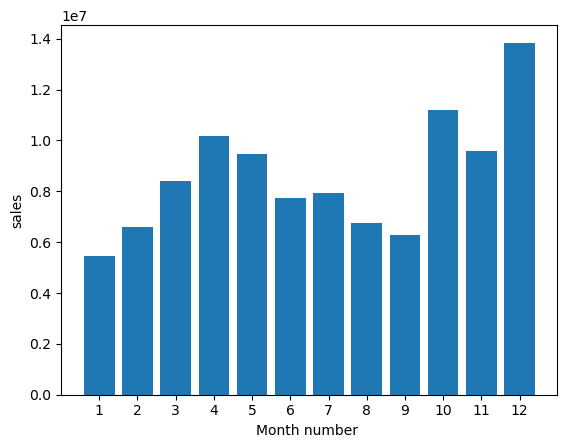

In [107]:
#visualiser d'après un graphe
months=range(1,13)
plt.bar(months,all_data.groupby('Month')['Sales'].sum())
plt.xticks(months)
plt.xlabel('Month number ')
plt.ylabel('sales')
plt.show()

# Dans quelle ville nous avons enregistré un maximum de commandes?

In [108]:
def city(x):
    return x.split(',')[1]

In [109]:
#extraire les villes dans Purchase Address
all_data['city']=all_data['Purchase Address'].apply(city)
all_data

C:\Users\ASUS\AppData\Local\Temp\ipykernel_6012\2475092994.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['city']=all_data['Purchase Address'].apply(city)


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,city
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles
...,...,...,...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",9,8.97,Los Angeles
11682,259354,iPhone,1,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",9,700.00,San Francisco
11683,259355,iPhone,1,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",9,700.00,San Francisco
11684,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",9,379.99,San Francisco


In [110]:
#conter les commandes dans chaque ville
all_data.groupby('city')['city'].count()

city
 Atlanta           44643
 Austin            29715
 Boston            59802
 Dallas            44460
 Los Angeles       88815
 New York City     74628
 Portland          37395
 San Francisco    134196
 Seattle           44196
Name: city, dtype: int64

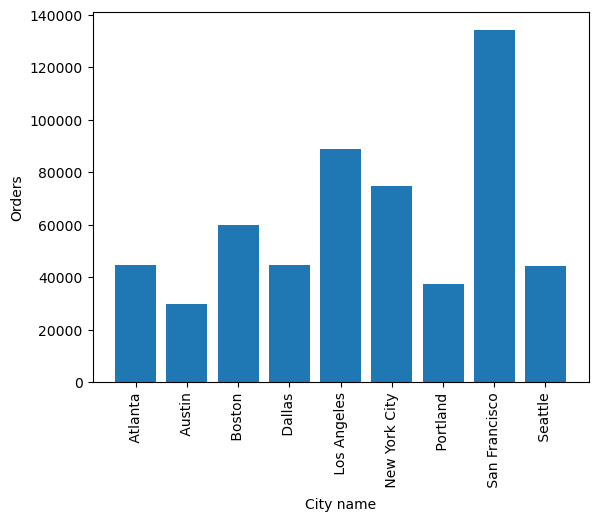

In [111]:
#visualiser d'après un graphe
plt.bar(all_data.groupby('city')['city'].count().index,all_data.groupby('city')['city'].count().values)
plt.xticks(rotation='vertical')
plt.xlabel('City name')
plt.ylabel('Orders')
plt.show()

# En quelle moment doit-on faire une compagne publicitaire pour avoir plus de ventes?

In [113]:
# convertir Order Date d'une colonne object vers une colonne datetime
all_data['Order Date']=pd.to_datetime(all_data['Order Date'], infer_datetime_format=True)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_6012\2481050174.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['Order Date']=pd.to_datetime(all_data['Order Date'], infer_datetime_format=True)


In [114]:
#extraire l'heure
all_data['Hour']=all_data['Order Date'].dt.hour
all_data.head(2)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_6012\2651249385.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['Hour']=all_data['Order Date'].dt.hour


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,city,Hour
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas,8
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston,22


- `dt.hour`: accéder au composant du temps dans datetime (Remarque: il vaut mieux de convertir 'object' vers 'datetime')
- ` infer_datetime_format=True` : une option plus rapide qu'on peut rajouter dans la fonction `to_datetime`. Dans certains cas, cela peut augmenter la vitesse d'analyse d'environ 5 à 10 fois.

In [116]:
all_data=all_data.drop(labels='Order Date v2', axis=1)

- `drop`: Supprimez les étiquettes spécifiées des lignes ou des colonnes.

In [117]:
all_data.columns

Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address', 'Month', 'Sales', 'city', 'Hour'],
      dtype='object')

- `columns`: Seulement les colonnes sous forme d'une liste.

In [118]:
#voir l'évolution de commandes par heure
keys=[]   #variable pour créer une liste pour numérotage 
hours=[]  #variable pour créer une liste des nombres de commandes par heure
for key,hour in all_data.groupby('Hour'):
    keys.append(key)
    hours.append(len(hour))

- `append()`: Ajoute un élément à la fin de la liste.
- `len()` : Fonction renvoie le nombre d'éléments dans un objet. 

In [119]:
hours

[11730,
 7050,
 3729,
 2493,
 2562,
 3963,
 7446,
 12033,
 18768,
 26244,
 32832,
 37233,
 37761,
 36387,
 32952,
 30525,
 31152,
 32697,
 36840,
 38715,
 36684,
 32763,
 26466,
 18825]

Text(0, 0.5, 'nombre des commandes')

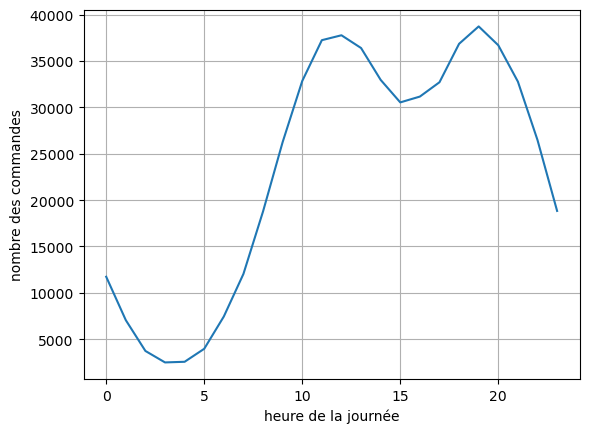

In [120]:
#visualiser d'après un graphe
plt.grid()
plt.plot(keys,hours)
plt.xlabel('heure de la journée')
plt.ylabel('nombre des commandes')

# Quel produit se vend le plus?

<AxesSubplot:xlabel='Product'>

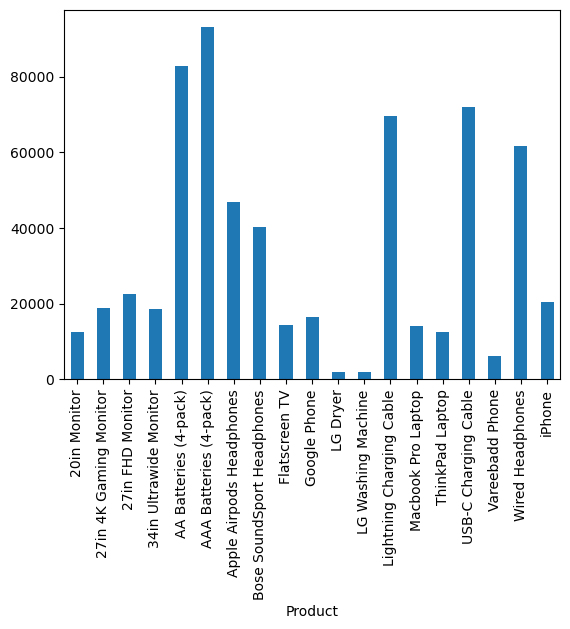

In [121]:
#visualiser toute la quantitée commander
all_data.groupby('Product')['Quantity Ordered'].sum().plot(kind='bar')

In [122]:
#extraire les prix de chaque produits
all_data.groupby('Product')['Price Each'].mean()

Product
20in Monitor                   109.99
27in 4K Gaming Monitor         389.99
27in FHD Monitor               149.99
34in Ultrawide Monitor         379.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Apple Airpods Headphones       150.00
Bose SoundSport Headphones      99.99
Flatscreen TV                  300.00
Google Phone                   600.00
LG Dryer                       600.00
LG Washing Machine             600.00
Lightning Charging Cable        14.95
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
USB-C Charging Cable            11.95
Vareebadd Phone                400.00
Wired Headphones                11.99
iPhone                         700.00
Name: Price Each, dtype: float64

In [123]:
products=all_data.groupby('Product')['Quantity Ordered'].sum().index
quantity=all_data.groupby('Product')['Quantity Ordered'].sum()
prices=all_data.groupby('Product')['Price Each'].mean()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_6012\127784123.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(products,rotation='vertical',size=8)


[Text(0, 0, '20in Monitor'),
 Text(1, 0, '27in 4K Gaming Monitor'),
 Text(2, 0, '27in FHD Monitor'),
 Text(3, 0, '34in Ultrawide Monitor'),
 Text(4, 0, 'AA Batteries (4-pack)'),
 Text(5, 0, 'AAA Batteries (4-pack)'),
 Text(6, 0, 'Apple Airpods Headphones'),
 Text(7, 0, 'Bose SoundSport Headphones'),
 Text(8, 0, 'Flatscreen TV'),
 Text(9, 0, 'Google Phone'),
 Text(10, 0, 'LG Dryer'),
 Text(11, 0, 'LG Washing Machine'),
 Text(12, 0, 'Lightning Charging Cable'),
 Text(13, 0, 'Macbook Pro Laptop'),
 Text(14, 0, 'ThinkPad Laptop'),
 Text(15, 0, 'USB-C Charging Cable'),
 Text(16, 0, 'Vareebadd Phone'),
 Text(17, 0, 'Wired Headphones'),
 Text(18, 0, 'iPhone')]

<Figure size 4000x2400 with 0 Axes>

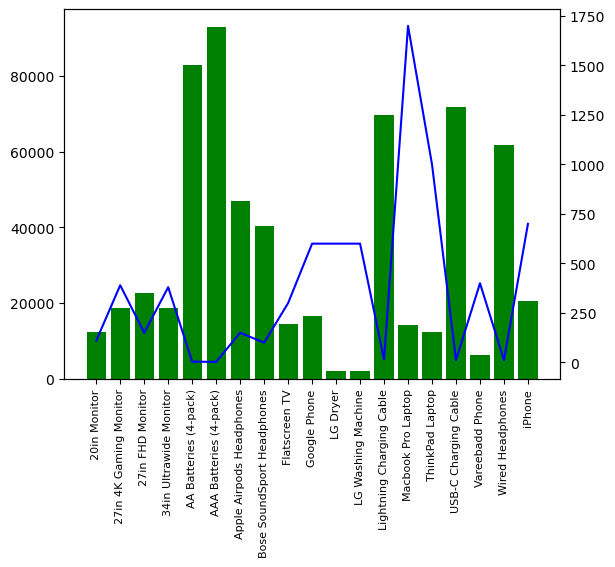

In [124]:
#visualiser dans un graphe
plt.figure(figsize=(40,24))
fig,ax1=plt.subplots()
ax2=ax1.twinx()
ax1.bar(products,quantity,color='g')
ax2.plot(products,prices,'b-')
ax1.set_xticklabels(products,rotation='vertical',size=8)

# Quelles sont les combinaisons de produits qui se vendent le plus?

In [125]:
df=all_data[all_data['Order ID'].duplicated(keep=False)]


- `duplicated()` :  Indiquant les lignes en double.
- `keep=False`: Tous les doublons sont True.

In [126]:
#chercher les combinaisons
df['Grouped']=df.groupby('Order ID')['Product'].transform(lambda x:','.join(x))
 

- `transform()`: Renvoie un `DataFrame` ayant les mêmes index que l'objet d'origine rempli avec les valeurs transformées .
- `lambda` :  La fonction ``lambda`` renverra alors une valeur pour chaque élément en fonction de l'expression que vous lui avez transmise.
    - `join(x)` : Joindre x

In [127]:
df2=df.drop_duplicates(subset=['Order ID'])


- `drop_duplicates()` : Renvoie DataFrame avec les lignes en double supprimées.
    - `subset` : Ne considérez que certaines colonnes pour identifier les doublons, (par défaut: utiliser toutes les colonnes).

In [148]:
df2['Grouped'].value_counts()[3:10]

USB-C Charging Cable,USB-C Charging Cable,USB-C Charging Cable                      19792
Wired Headphones,Wired Headphones,Wired Headphones                                  17208
Apple Airpods Headphones,Apple Airpods Headphones,Apple Airpods Headphones          14575
Bose SoundSport Headphones,Bose SoundSport Headphones,Bose SoundSport Headphones    12505
27in FHD Monitor,27in FHD Monitor,27in FHD Monitor                                   7213
27in 4K Gaming Monitor,27in 4K Gaming Monitor,27in 4K Gaming Monitor                 5979
34in Ultrawide Monitor,34in Ultrawide Monitor,34in Ultrawide Monitor                 5935
Name: Grouped, dtype: int64

- `value_counts()` : Renvoie une série ou un DataFrame contenant le nombre de lignes uniques.

<AxesSubplot:ylabel='Grouped'>

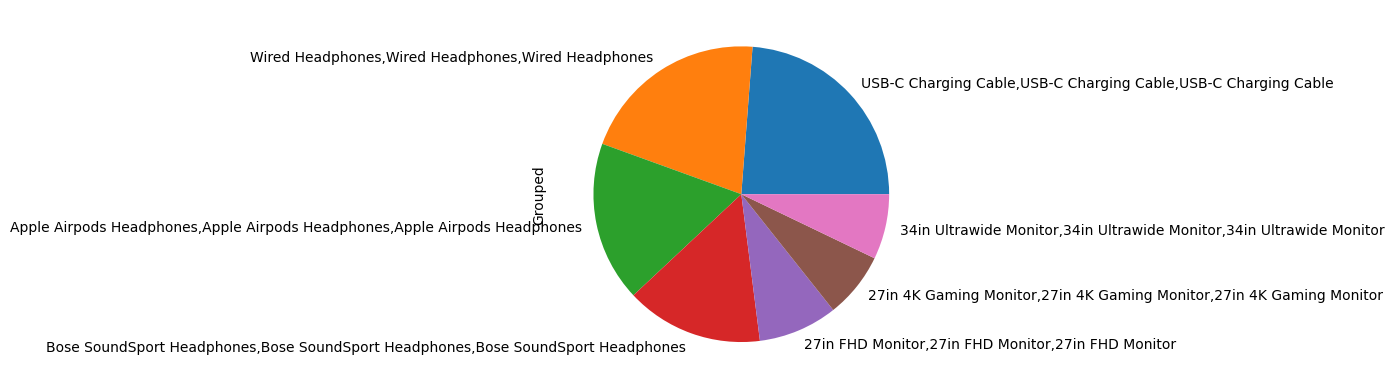

In [149]:
# visualiser dans un graphe
df2['Grouped'].value_counts()[3:10].plot.pie()